# Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carga de datos

In [2]:
data = pd.read_csv('./regresion 1v.csv')
data

,X1,Y
0,-0.533942,-240.516423
1,-0.343545,-56.415581
2,0.232700,141.891557
3,1.030887,-74.340292
4,-0.633679,20.184212
...,...,...
95,-1.578324,-201.718866
96,0.195961,129.159082
97,-0.888032,-134.291535
98,0.676064,113.968823


# Asignación de variables

In [3]:
X = data.X1
Y = data.Y

In [4]:
# La predicción es
# Y = aX + b

# a y b son incognitas
a = 0
b = 0

learning_rate = 0.1

# Como la regresión lineal es un algoritmo iterativo, hay que definir la
# cantidad de iteracione que se harán
iteraciones = 100

# Como vamos a hacer un Gradient Descent, necesitamos saber cuántos elementos se
# tienen, la cantidad total de data
items = len(X)

# Historial de los coeficientes en cada iteración
hist_a = []
hist_b = []
hist_error = []

# Algoritmo de Gradient Descent

In [5]:
for i in range(iteraciones):
    # Calculamos la predicción
    Y_prediccion = (a * X) + b

    # Calculamos el residual, el error, qué tanto se ha equivocado el algoritmo
    error = sum((Y_prediccion - Y) ** 2)/items
    # Y_prediccion - Y => Lo que la maquina predijo - lo que realmente era
    # Al cuadrado porque, si no, los positivos y negativos se cancelan
    # Como el resultado es un vector (un valor predicho y uno real), hay que
    # tener un promedio, por eso lo sumamos y lo dividimos entre la cantidad
    # total de items

    # Calculamos la derivada parcial de cada uno de los coeficientes
    d_a = sum(X * (Y_prediccion - Y))/items
    d_b = sum(Y_prediccion - Y)/items
    # Como el resultado es un vector (un valor predicho y uno real), hay que
    # tener un promedio, por eso lo sumamos y lo dividimos entre la cantidad
    # total de items

    # Calculamos en nuevo valor de los coeficientes
    a = a - (learning_rate * d_a)
    b = b - (learning_rate * d_b)

    # Actualizamos el historial de los coeficientes
    hist_a.append(a)
    hist_b.append(b)
    hist_error.append(error)

print(a, b)

97.80208733898684 17.941113564121178


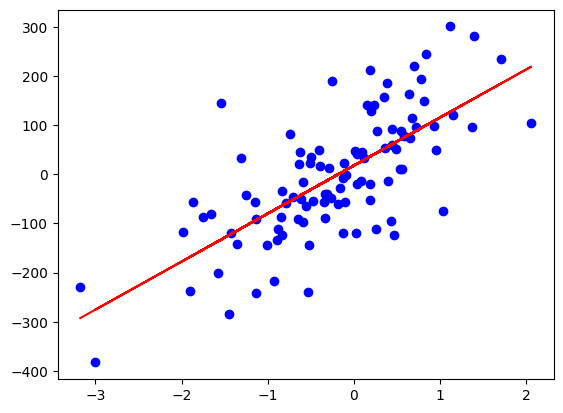

In [6]:
# Graficamos los resultados
fun = lambda x: (a * x) + b

Y_prediccion = fun(X)

plt.figure()

# La data
# Puntos azules
plt.plot(X, Y, 'bo')

# La predicción
# Línea roja
plt.plot(X, Y_prediccion, 'r-')

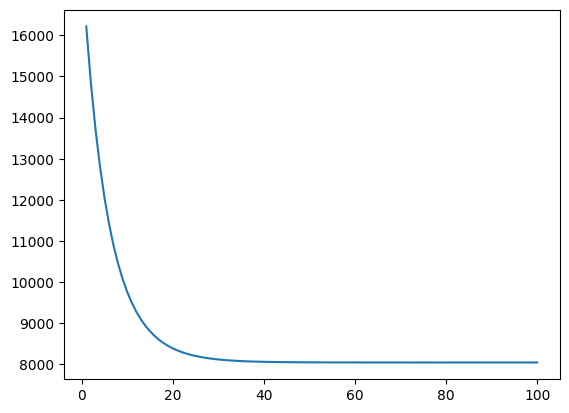

In [7]:
# Graficamos el historial del error a lo largo del algoritmo
plt.plot(np.linspace(1, iteraciones, iteraciones), hist_error)

Si jugamos con los valores del learning rate y las iteraciones, comprobaremos que:
* Con un learning rate bajo, el algoritmo tarda más tiempo en aprender
(necesita más iteraciones).
* Con un learning rate alto, el algoritmo aprende más rápido (necesita menos
iteraciones), pero hay que tener cuidado porque si es demasiado alto, es posible
que directamente el algoritmo no sea capaz de aprender nada.